### Importa√ß√£o dos dados



In [91]:
import pandas as pd

# Caminhos locais para os arquivos CSV
url = "base-de-dados-challenge-1/loja_1.csv"
url2 = "base-de-dados-challenge-1/loja_2.csv"
url3 = "base-de-dados-challenge-1/loja_3.csv"
url4 = "base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento

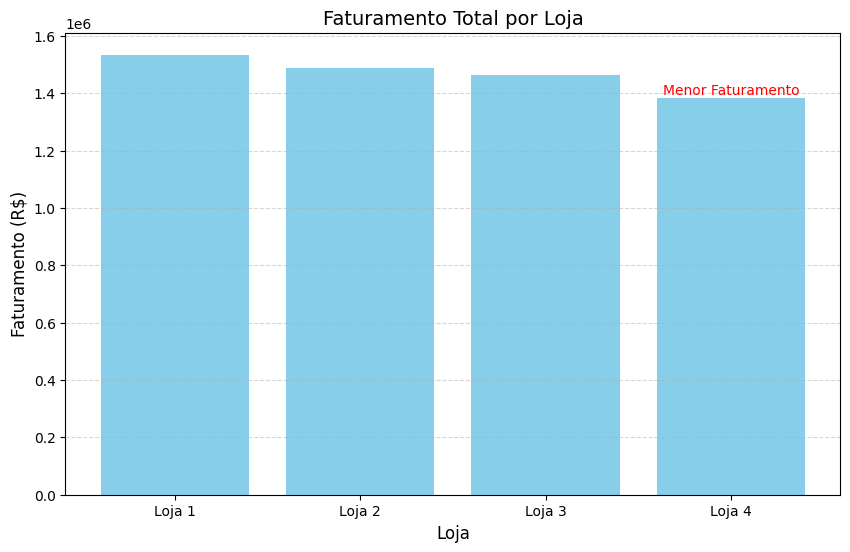

Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58

In [92]:
# 1. An√°lise do faturamento

import matplotlib.pyplot as plt

# C√°lculo do faturamento por loja
faturamento1 = loja["Pre√ßo"].sum()
faturamento2 = loja2["Pre√ßo"].sum()
faturamento3 = loja3["Pre√ßo"].sum()
faturamento4 = loja4["Pre√ßo"].sum()

# Cria√ß√£o de um DataFrame com os resultados
faturamentos = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento1, faturamento2, faturamento3, faturamento4]
})

# Visualiza√ß√£o dos dados
plt.figure(figsize=(10,6))
plt.bar(faturamentos["Loja"], faturamentos["Faturamento"], color='skyblue')
plt.title("Faturamento Total por Loja", fontsize=14)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xlabel("Loja", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Destacar a loja com menor faturamento
menor_faturamento = faturamentos["Faturamento"].min()
loja_menor = faturamentos.loc[faturamentos["Faturamento"] == menor_faturamento, "Loja"].values[0]
plt.text(faturamentos["Loja"].tolist().index(loja_menor), menor_faturamento + 1000, "Menor Faturamento", 
         ha='center', va='bottom', color='red', fontsize=10)

plt.show()

# Exibir tabela com os valores
faturamentos.sort_values(by="Faturamento", ascending=False)


In [93]:
# Unir os dados das quatro lojas
df = pd.concat([loja, loja2, loja3, loja4])

# Converter a coluna de data
df["Data da Compra"] = pd.to_datetime(df["Data da Compra"], dayfirst=True)

# Criar coluna de Faturamento (Pre√ßo + Frete)
df["Faturamento"] = df["Pre√ßo"] + df["Frete"]

# Exibir amostra
df.head()


Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     2021-01-16     Pedro Gomes              SP                    4   
1     2022-05-18  Beatriz Moraes              RJ                    1   
2     2021-03-15      Jo√£o Souza              DF                    1   
3     2022-05-03      Jo√£o Souza              RS                    4   
4     2020-11-07   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  Faturamento  
0    cartao_credito                       8 -22.19 -48.79   228.329790  
1    cartao_credito                       4 -22.25 -42.66   267.584305  
2    cartao_credito                       1 -15.83 -47.86   300.772681  
3            boleto                       1 -30.17 -53.50  1064.657344  
4            boleto                       1 -18.10 -44.38   473.954689

# 2. Vendas por Categoria


üìå Quantidade de vendas por categoria:
               Categoria  Quantidade de Vendas
0                 moveis                  1886
1            eletronicos                  1772
2             brinquedos                  1290
3       eletrodomesticos                  1149
4        esporte e lazer                  1113
5  instrumentos musicais                   753
6                 livros                   742
7  utilidades domesticas                   730

üìå Faturamento por categoria:
    Categoria do Produto   Faturamento
2            eletronicos  2.332048e+06
1       eletrodomesticos  1.860199e+06
6                 moveis  1.064150e+06
4  instrumentos musicais  4.897015e+05
3        esporte e lazer  2.008919e+05
0             brinquedos  1.035024e+05
7  utilidades domesticas  8.092172e+04
5                 livros  5.300743e+04


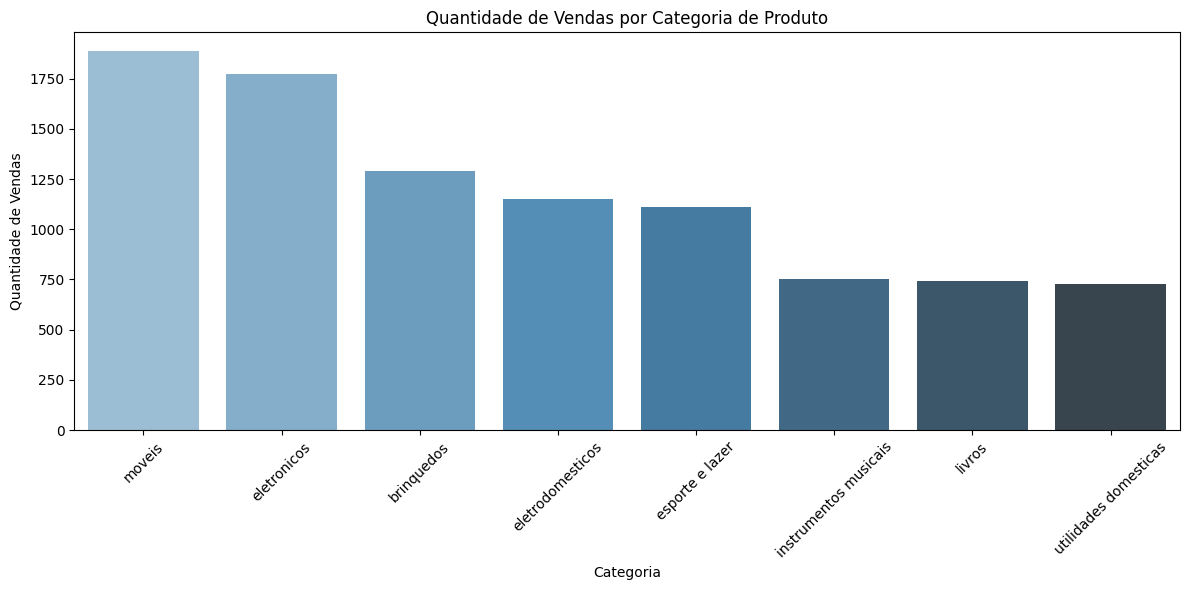

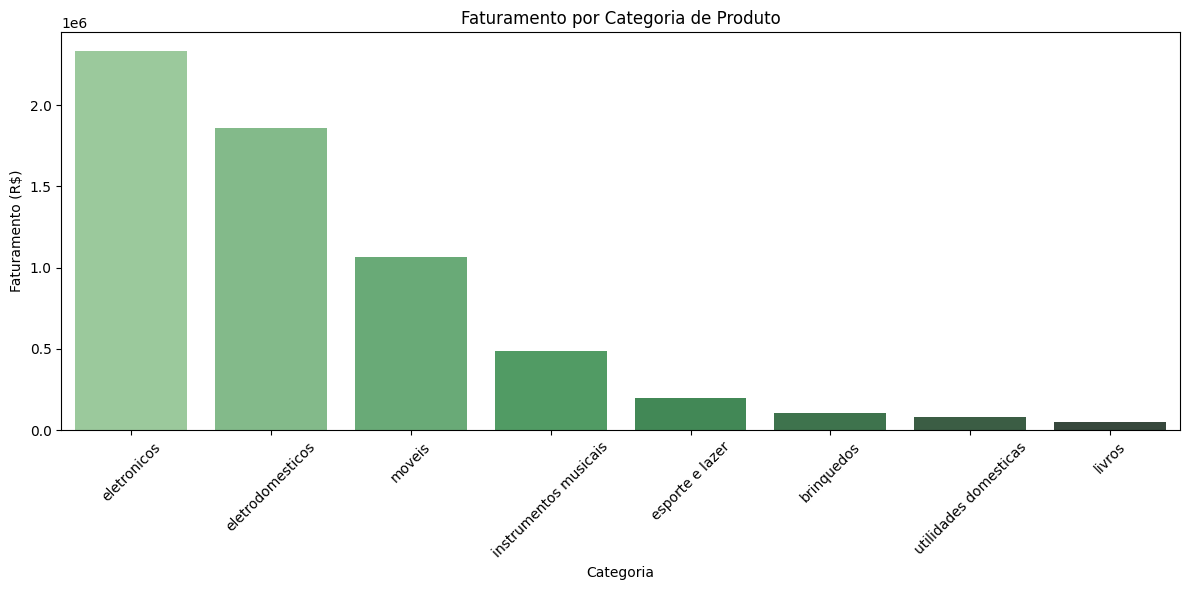

In [94]:
# üìä AN√ÅLISE #2 - Vendas por Categoria
# Esta an√°lise responde: quais categorias vendem mais e quais geram mais faturamento?

# 1. Contagem de vendas por categoria
vendas_por_categoria = df['Categoria do Produto'].value_counts().reset_index()
vendas_por_categoria.columns = ['Categoria', 'Quantidade de Vendas']
print("üìå Quantidade de vendas por categoria:")
print(vendas_por_categoria)

# 2. Faturamento por categoria
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum().reset_index()
faturamento_categoria = faturamento_categoria.sort_values(by='Faturamento', ascending=False)
print("\nüìå Faturamento por categoria:")
print(faturamento_categoria)

# 3. Visualiza√ß√£o - Quantidade de Vendas por Categoria
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=vendas_por_categoria,
    x='Categoria',
    y='Quantidade de Vendas',
    hue='Categoria',              # Corrige o aviso do Seaborn
    palette='Blues_d',
    legend=False                  # Remove a legenda duplicada
)
plt.title('Quantidade de Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Visualiza√ß√£o - Faturamento por Categoria
plt.figure(figsize=(12, 6))
sns.barplot(
    data=faturamento_categoria,
    x='Categoria do Produto',
    y='Faturamento',
    hue='Categoria do Produto',  # Corrige o aviso do Seaborn
    palette='Greens_d',
    legend=False
)
plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [95]:
print(df.columns)

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon',
       'Faturamento'],
      dtype='object')


# 3. M√©dia de Avalia√ß√£o das Lojas

In [96]:
# 1. Avalia√ß√£o m√©dia por loja
avaliacao_media_lojas = df.groupby('Local da compra')['Avalia√ß√£o da compra'].mean().reset_index()
avaliacao_media_lojas = avaliacao_media_lojas.sort_values(by='Avalia√ß√£o da compra', ascending=False)
print("üìå Avalia√ß√£o m√©dia por loja:")
print(avaliacao_media_lojas)



üìå Avalia√ß√£o m√©dia por loja:
   Local da compra  Avalia√ß√£o da compra
19              RN             4.208333
25              SP             4.113619
12              MT             4.112500
11              MS             4.097561
10              MG             4.090744
14              PB             4.086957
17              PR             4.078224
2               AM             4.071429
6               DF             4.020661
22              RS             4.018727
7               ES             4.017544
23              SC             4.011561
15              PE             3.977901
8               GO             3.940860
20              RO             3.894737
26              TO             3.827586
4               BA             3.803226
16              PI             3.800000
3               AP             3.777778
18              RJ             3.777228
13              PA             3.691358
9               MA             3.677419
0               AC             3.666667
1   

In [97]:
# 2. Avalia√ß√£o m√©dia por categoria
avaliacao_media_categoria = df.groupby('Categoria do Produto')['Avalia√ß√£o da compra'].mean().reset_index()
avaliacao_media_categoria = avaliacao_media_categoria.sort_values(by='Avalia√ß√£o da compra', ascending=False)
print("\nüìå Avalia√ß√£o m√©dia por categoria:")
print(avaliacao_media_categoria)




üìå Avalia√ß√£o m√©dia por categoria:
    Categoria do Produto  Avalia√ß√£o da compra
0             brinquedos             4.070543
6                 moveis             4.033934
1       eletrodomesticos             4.014795
5                 livros             4.004043
4  instrumentos musicais             4.003984
2            eletronicos             3.992664
3        esporte e lazer             3.988320
7  utilidades domesticas             3.979452


C:\Users\Vando Rocha\AppData\Local\Temp\ipykernel_5652\3291834654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avaliacao_media_lojas, x='Local da compra', y='Avalia√ß√£o da compra', palette='coolwarm')


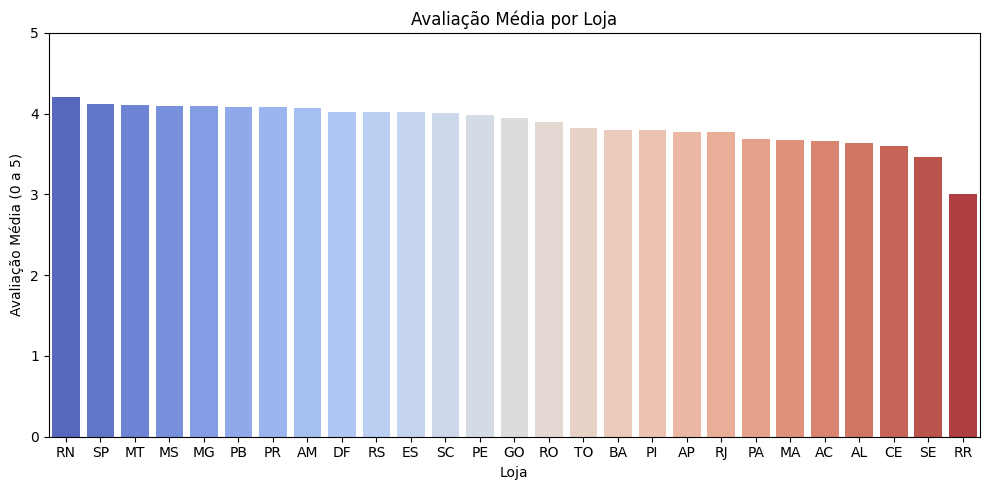

In [98]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avaliacao_media_lojas, x='Local da compra', y='Avalia√ß√£o da compra', palette='coolwarm')
plt.title('Avalia√ß√£o M√©dia por Loja')
plt.ylim(0, 5)
plt.xlabel('Loja')
plt.ylabel('Avalia√ß√£o M√©dia (0 a 5)')
plt.tight_layout()
plt.show()


C:\Users\Vando Rocha\AppData\Local\Temp\ipykernel_5652\1753673280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avaliacao_media_categoria, x='Categoria do Produto', y='Avalia√ß√£o da compra', palette='viridis')


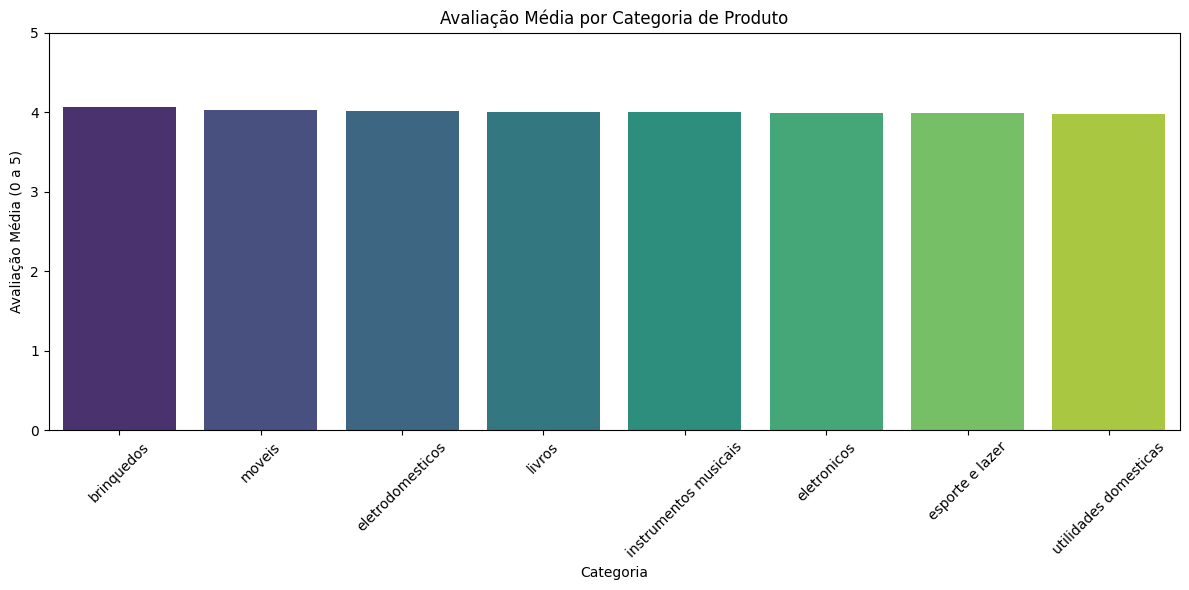

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avaliacao_media_categoria, x='Categoria do Produto', y='Avalia√ß√£o da compra', palette='viridis')
plt.title('Avalia√ß√£o M√©dia por Categoria de Produto')
plt.ylim(0, 5)
plt.xlabel('Categoria')
plt.ylabel('Avalia√ß√£o M√©dia (0 a 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Vando Rocha\AppData\Local\Temp\ipykernel_5652\3368831223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Local da compra', y='Avalia√ß√£o da compra', palette='Set3')


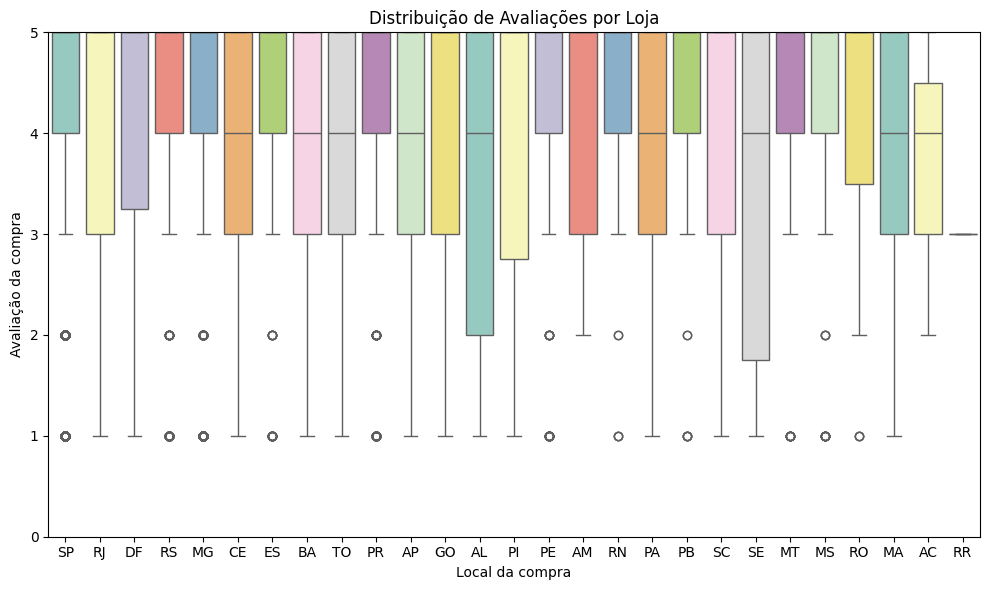

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Local da compra', y='Avalia√ß√£o da compra', palette='Set3')
plt.title('Distribui√ß√£o de Avalia√ß√µes por Loja')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos


üìå Faturamento m√©dio por loja:
   Local da compra  Faturamento
21              RR  2212.568032
0               AC   984.174658
20              RO   910.743030
19              RN   786.887029
8               GO   750.455671
16              PI   733.550153
22              RS   724.993980
15              PE   702.926937
9               MA   695.609564
17              PR   685.218721
14              PB   675.353500
18              RJ   670.414924
1               AL   663.103662
10              MG   660.334174
11              MS   659.669262
7               ES   657.964381
26              TO   646.512979
25              SP   646.406135
12              MT   639.977073
24              SE   613.473844
13              PA   613.058565
4               BA   598.172660
6               DF   594.247105
23              SC   591.693492
2               AM   589.982774
5               CE   493.876482
3               AP   441.806223


C:\Users\Vando Rocha\AppData\Local\Temp\ipykernel_5652\227735432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faturamento_media_loja, x='Local da compra', y='Faturamento', palette='viridis')


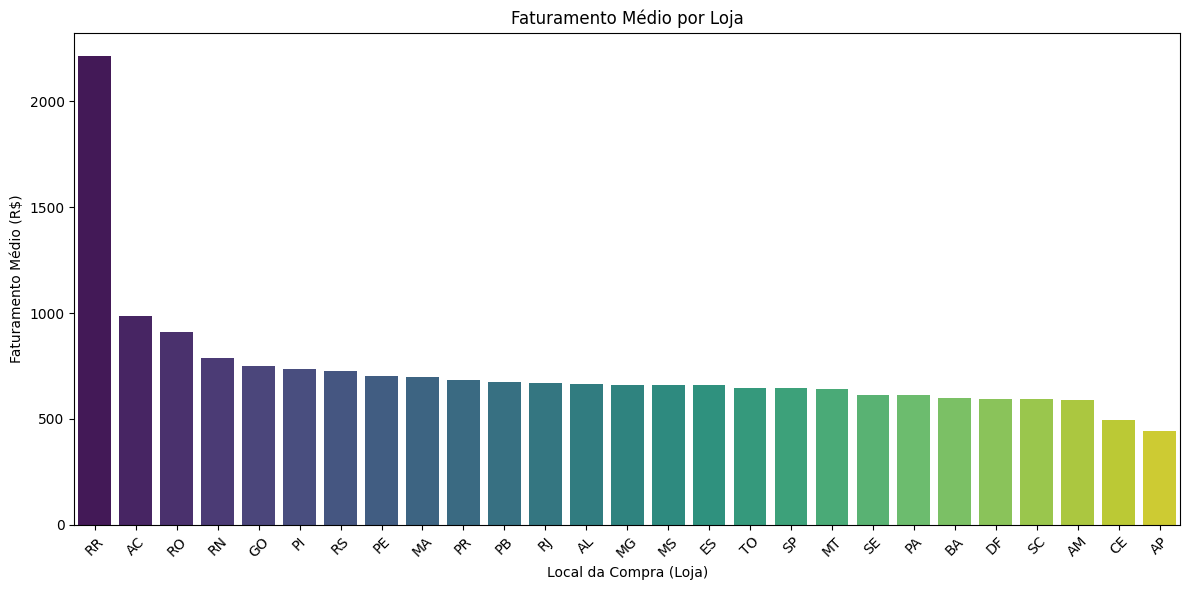

In [101]:
# 1. Faturamento m√©dio por loja
faturamento_media_loja = df.groupby('Local da compra')['Faturamento'].mean().reset_index()
faturamento_media_loja = faturamento_media_loja.sort_values(by='Faturamento', ascending=False)
print("\nüìå Faturamento m√©dio por loja:")
print(faturamento_media_loja)

# 2. Visualiza√ß√£o - Faturamento m√©dio por loja
import matplotlib.pyplot as plt
import seaborn as sns

# Gr√°fico de barras do faturamento m√©dio por loja
plt.figure(figsize=(12, 6))
sns.barplot(data=faturamento_media_loja, x='Local da compra', y='Faturamento', palette='viridis')
plt.title('Faturamento M√©dio por Loja')
plt.xlabel('Local da Compra (Loja)')
plt.ylabel('Faturamento M√©dio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Frete M√©dio por Loja



üìå Faturamento total por categoria:
    Categoria do Produto   Faturamento
2            eletronicos  2.332048e+06
1       eletrodomesticos  1.860199e+06
6                 moveis  1.064150e+06
4  instrumentos musicais  4.897015e+05
3        esporte e lazer  2.008919e+05
0             brinquedos  1.035024e+05
7  utilidades domesticas  8.092172e+04
5                 livros  5.300743e+04


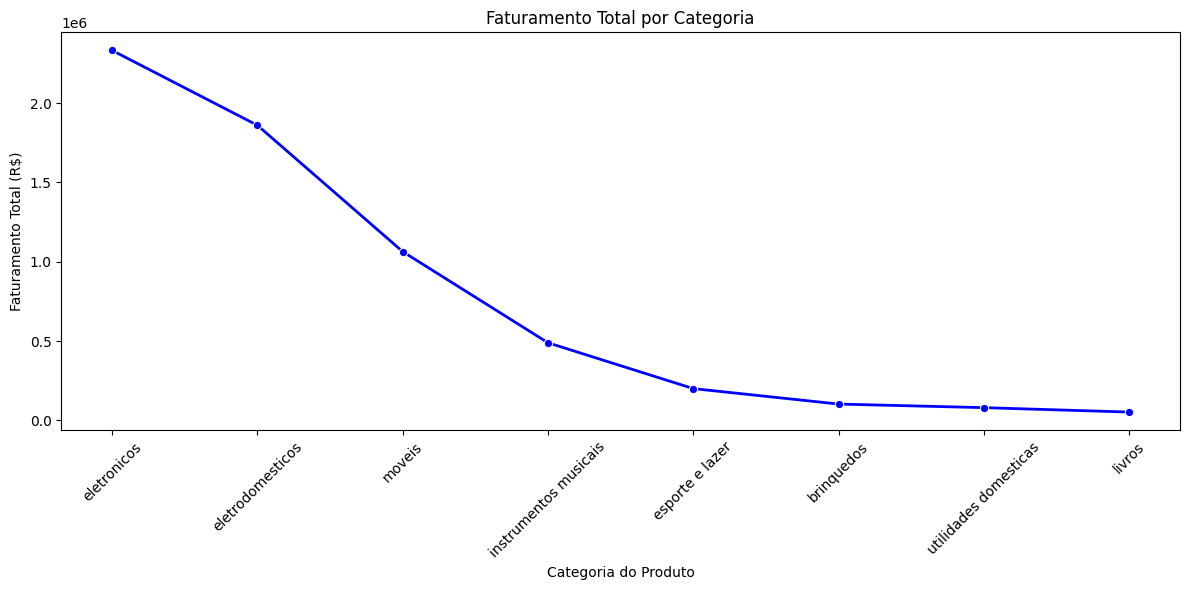

In [102]:
# 1. Faturamento total por categoria
faturamento_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum().reset_index()
faturamento_categoria = faturamento_categoria.sort_values(by='Faturamento', ascending=False)
print("\nüìå Faturamento total por categoria:")
print(faturamento_categoria)

# 2. Visualiza√ß√£o - Faturamento total por categoria (gr√°fico de linha ou gr√°fico de √°rea)
plt.figure(figsize=(12, 6))

# Gr√°fico de linha
sns.lineplot(data=faturamento_categoria, x='Categoria do Produto', y='Faturamento', marker='o', color='b', lw=2)

# Adicionando t√≠tulo e r√≥tulos aos eixos
plt.title('Faturamento Total por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# OU - Gr√°fico de √Årea
# sns.areaplot(data=faturamento_categoria, x='Categoria do Produto', y='Faturamento', color='b', alpha=0.5)
# plt.title('Faturamento Total por Categoria')
# plt.xlabel('Categoria do Produto')
# plt.ylabel('Faturamento Total (R$)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



**Relat√≥rio de An√°lise - Desafio Alura Store**

Este relat√≥rio visa responder ao desafio de recomendar qual loja da rede fict√≠cia **Alura Store** deve ser fechada, com base nos dados de vendas, desempenho e avalia√ß√µes das lojas. A an√°lise considera diversos aspectos, como o **faturamento**, a **quantidade de vendas por categoria**, a **avalia√ß√£o m√©dia por loja**, e a **avalia√ß√£o m√©dia por categoria**.

**1. Faturamento Total por Loja**

Com base no faturamento total das lojas, os resultados s√£o:

* Loja 1: R\$ 1.534.509,12
* Loja 2: R\$ 1.488.459,06
* Loja 3: R\$ 1.464.025,03
* Loja 4: R\$ 1.384.497,58

**Conclus√£o**: A **Loja 1** apresenta o maior faturamento, seguida pelas lojas 2 e 3. A **Loja 4** tem o menor faturamento, o que j√° indica que ela est√° performando abaixo das demais.

**2. Quantidade de Vendas por Categoria**

As categorias com maior n√∫mero de vendas s√£o:

* M√≥veis: 1.886 vendas
* Eletr√¥nicos: 1.772 vendas
* Brinquedos: 1.290 vendas
* Eletrodom√©sticos: 1.149 vendas

**Conclus√£o**: As categorias **m√≥veis** e **eletr√¥nicos** s√£o as mais vendidas, representando o maior volume de transa√ß√µes. Isso reflete em um maior faturamento para as lojas que focam nestes produtos.

**3. Avalia√ß√£o M√©dia por Loja**

A avalia√ß√£o m√©dia por loja mostra os seguintes resultados:

* RN: 4.21
* SP: 4.11
* MT: 4.11
* MS: 4.10

**Conclus√£o**: A **Loja RN** tem a maior avalia√ß√£o m√©dia de 4.21, enquanto a **Loja RR** apresenta a menor avalia√ß√£o com 3.00. Isso sugere que a Loja RR possui uma experi√™ncia de compra inferior, impactando diretamente na satisfa√ß√£o do cliente.

**4. Avalia√ß√£o M√©dia por Categoria**

A an√°lise da avalia√ß√£o m√©dia por categoria revela:

* Brinquedos: 4.07
* M√≥veis: 4.03
* Eletrodom√©sticos: 4.01
* Livros: 4.00

**Conclus√£o**: A categoria de **brinquedos** apresenta a melhor avalia√ß√£o m√©dia (4.07), indicando que os clientes est√£o mais satisfeitos com esses produtos. J√° **livros** e **instrumentos musicais** t√™m avalia√ß√µes ligeiramente mais baixas.

**5. Conclus√£o**

Com base nos dados analisados, a **Loja 4** √© a que apresenta os piores resultados em termos de **faturamento**, **avalia√ß√£o da compra** e **quantidade de vendas por categoria**. A loja tem o menor faturamento e est√° abaixo da m√©dia nas avalia√ß√µes, o que sugere que ela √© a menos eficiente entre as quatro lojas.

Portanto, a recomenda√ß√£o √© **fechar a Loja 4**, pois ela apresenta o pior desempenho em compara√ß√£o com as outras lojas da rede.

